Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Uploading the dataset

In [2]:
file_path = open("C:/Users/msnchary/OneDrive/Desktop/anudip/Python_project/financial_regression.csv")
data = pd.read_csv(file_path)

DATA CLEANING:
Checking the shape of the dataset

In [3]:
print(data.shape)

(3904, 47)


In [4]:
# Count rows where all values are NaN
blank_rows_count = data[data.isnull().all(axis=1)].shape[0]

print(f"Number of completely blank rows: {blank_rows_count}")


Number of completely blank rows: 0


In [5]:
data.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [6]:
# Columns to check for 185 nulls
columns_to_drop_nulls = [
    'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume', 'sp500 high-low',
    'nasdaq open', 'nasdaq high', 'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
    'silver open', 'silver high', 'silver low', 'silver close', 'silver volume', 'silver high-low',
    'oil open', 'gold high', 'gold low', 'gold close', 'gold volume'
]

# Drop rows where any of these columns have nulls
data_cleaned = data.dropna(subset=columns_to_drop_nulls)

# Replace nulls in specific columns with 0
columns_to_fill = ['GDP', 'us_rates_%','usd_chf','eur_usd']
data_cleaned[columns_to_fill] = data_cleaned[columns_to_fill].fillna(0)

# Verify the results
print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")
print("Remaining null values:\n", data_cleaned.isnull().sum())


Original dataset shape: (3904, 47)
Cleaned dataset shape: (3719, 47)
Remaining null values:
 date                     0
sp500 open               0
sp500 high               0
sp500 low                0
sp500 close              0
sp500 volume             0
sp500 high-low           0
nasdaq open              0
nasdaq high              0
nasdaq low               0
nasdaq close             0
nasdaq volume            0
nasdaq high-low          0
us_rates_%               0
CPI                   3602
usd_chf                  0
eur_usd                  0
GDP                      0
silver open              0
silver high              0
silver low               0
silver close             0
silver volume            0
silver high-low          0
oil open                 0
oil high                 0
oil low                  0
oil close                0
oil volume               0
oil high-low             0
platinum open            0
platinum high            0
platinum low             0
platinum close  

C:\Users\msnchary\AppData\Local\Temp\ipykernel_3248\3931678542.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columns_to_fill] = data_cleaned[columns_to_fill].fillna(0)


In [7]:
data= data_cleaned
print(data.shape)

(3719, 47)


Printing the top 10 rows

In [8]:
data.head(10)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,1/14/2010,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.020,43.86,44.84,364528.0,1.160,111.51,112.37,110.79,112.030,18305238.0
1,1/15/2010,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.760,44.40,45.76,442210.0,1.360,111.35,112.01,110.38,110.860,18000724.0
3,1/19/2010,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.080,45.70,46.94,629150.0,1.380,110.95,111.75,110.83,111.520,10467927.0
4,1/20/2010,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.310,45.17,47.05,643198.0,2.140,109.97,110.05,108.46,108.940,17534231.0
5,1/21/2010,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,...,46.980,45.07,45.30,388457.0,1.910,108.48,108.78,106.61,107.370,25747831.0
6,1/22/2010,111.20,111.74,109.09,109.21,345627282.0,2.65,45.34,45.480,44.04,...,44.386,42.60,43.30,343595.0,1.786,106.93,107.68,106.01,107.170,24209966.0
7,1/25/2010,110.21,110.41,109.41,109.77,186751367.0,1.00,44.39,44.600,44.12,...,44.420,43.43,44.36,184431.0,0.990,107.44,107.72,107.07,107.480,13170442.0
8,1/26/2010,109.34,110.47,109.04,109.31,210788669.0,1.43,44.28,44.890,44.05,...,43.100,42.38,42.75,338167.0,0.720,106.87,107.99,106.75,107.560,12274165.0
9,1/27/2010,109.17,110.08,108.33,109.83,271482263.0,1.75,44.29,44.850,44.01,...,42.440,40.93,41.34,419800.0,1.510,107.53,108.80,106.16,106.528,18991219.0
10,1/28/2010,110.19,110.25,107.91,108.57,315523641.0,2.34,44.40,44.430,43.32,...,42.630,40.85,42.16,281792.0,1.780,107.18,107.23,105.18,106.480,16792253.0


DATA ANALYSIS:
Comparing the commodities with each other to find out the trend.

Comparing the gold with silver prices

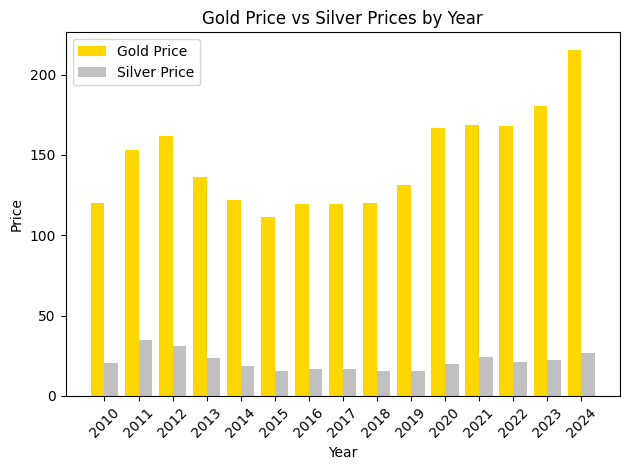

In [ ]:
#ColumnChart of gold with silver prices 
#graph1
data['year'] = pd.to_datetime(data['date']).dt.year

# Group data by year and calculate the mean for 'gold close' and 'silver close'
yearly_data = data.groupby('year')[['gold close', 'silver close']].mean().reset_index()

# Column Chart: Gold vs Silver Prices by Year
years = np.arange(len(yearly_data['year']))
width = 0.4

plt.bar(years - width / 2, yearly_data['gold close'], width, label='Gold Price', color='gold')
plt.bar(years + width / 2, yearly_data['silver close'], width, label='Silver Price', color='silver')

plt.title('Gold Price vs Silver Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(years, yearly_data['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Comparing the gold with platinum

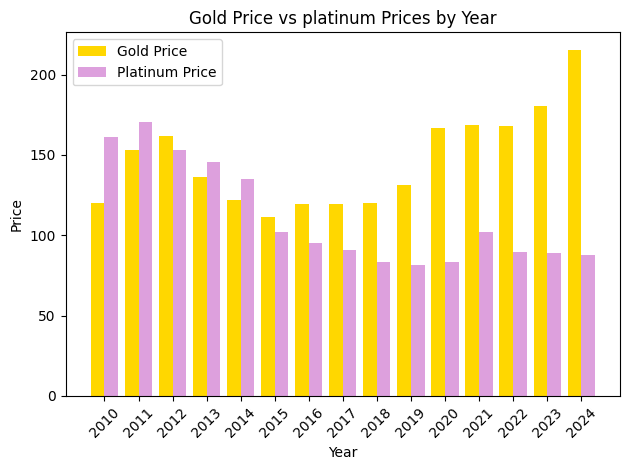

In [ ]:
#ColumnChart of gold with platinum prices 
#graph2
data['year'] = pd.to_datetime(data['date']).dt.year
yearly_data = data.groupby('year')[['gold close', 'platinum close']].mean().reset_index()
years = np.arange(len(yearly_data['year']))

plt.bar(years - width / 2, yearly_data['gold close'], width, label='Gold Price', color='gold')
plt.bar(years + width / 2, yearly_data['platinum close'], width, label='Platinum Price', color='plum')

plt.title('Gold Price vs platinum Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(years, yearly_data['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Comparing the gold with palladium price

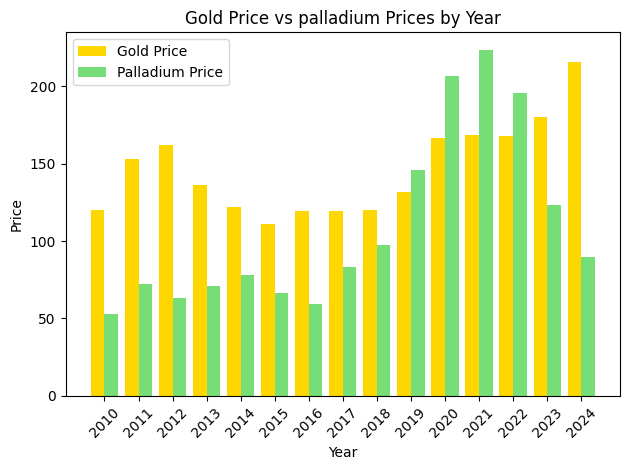

In [ ]:
# columnChart: Gold vs platinum Prices
#graph3
data['year'] = pd.to_datetime(data['date']).dt.year
yearly_data = data.groupby('year')[['gold close', 'palladium close']].mean().reset_index()
years = np.arange(len(yearly_data['year']))

plt.bar(years - width / 2, yearly_data['gold close'], width, label='Gold Price', color='gold')
plt.bar(years + width / 2, yearly_data['palladium close'], width, label='Palladium Price', color='#77DD77')

plt.title('Gold Price vs palladium Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(years, yearly_data['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Comparing the gold with oil price

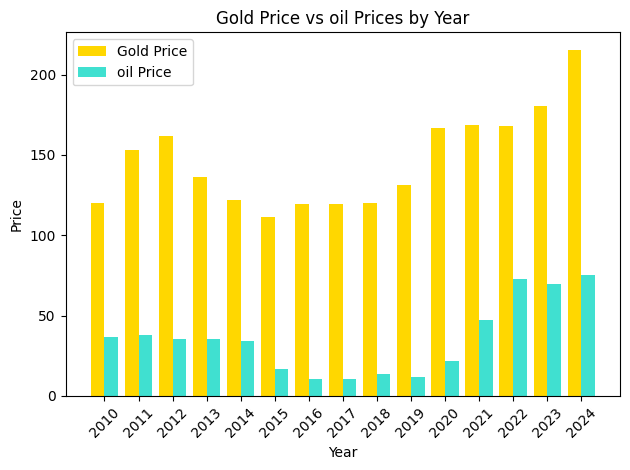

In [17]:
# columnChart: Gold vs platinum Prices
#graph4
data['year'] = pd.to_datetime(data['date']).dt.year
yearly_data = data.groupby('year')[['gold close', 'oil close']].mean().reset_index()
years = np.arange(len(yearly_data['year']))

plt.bar(years - width / 2, yearly_data['gold close'], width, label='Gold Price', color='gold')
plt.bar(years + width / 2, yearly_data['oil close'], width, label='oil Price', color='turquoise')

plt.title('Gold Price vs oil Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(years, yearly_data['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Time Series Plot: Gold price vs S&P500 and NASDAQ 100

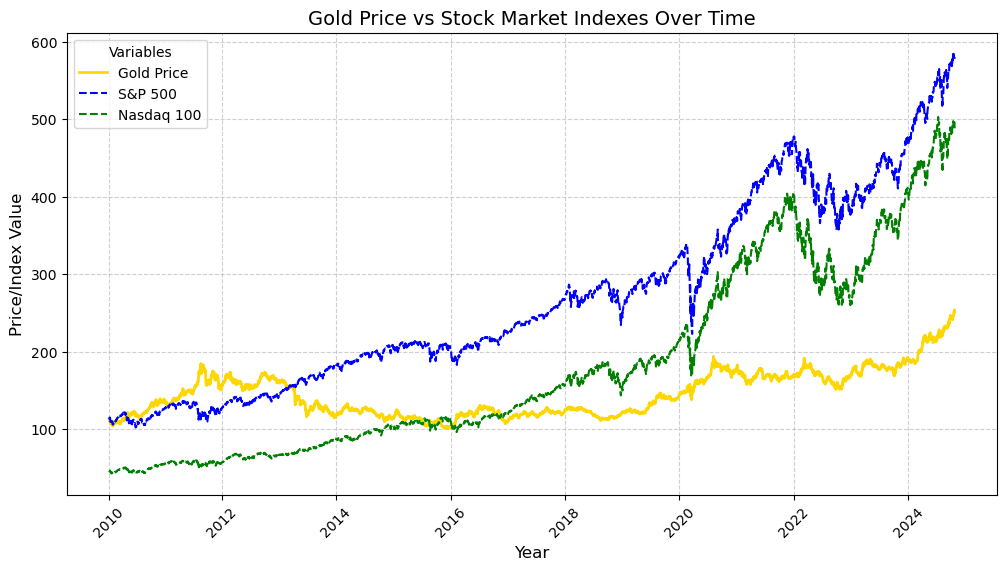

In [ ]:
#graph5
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column
data['year'] = data['date'].dt.year

# Time Series Plot: Gold Price vs S&P 500 and Nasdaq 100
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['gold close'], label='Gold Price', color='gold', linewidth=2)
plt.plot(data['date'], data['sp500 close'], label='S&P 500', color='blue', linestyle='--')
plt.plot(data['date'], data['nasdaq close'], label='Nasdaq 100', color='green', linestyle='--')

# Add title and labels
plt.title('Gold Price vs Stock Market Indexes Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price/Index Value', fontsize=12)

# Customize x-axis to show alternate years
years = data['year'].unique()
alternate_years = [year for i, year in enumerate(years) if i % 2 == 0]
plt.xticks(ticks=[data[data['year'] == year]['date'].iloc[0] for year in alternate_years],
           labels=alternate_years, rotation=45)

# Add legend and grid
plt.legend(title="Variables", loc="upper left")
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


Comparing CPI with Gold price.

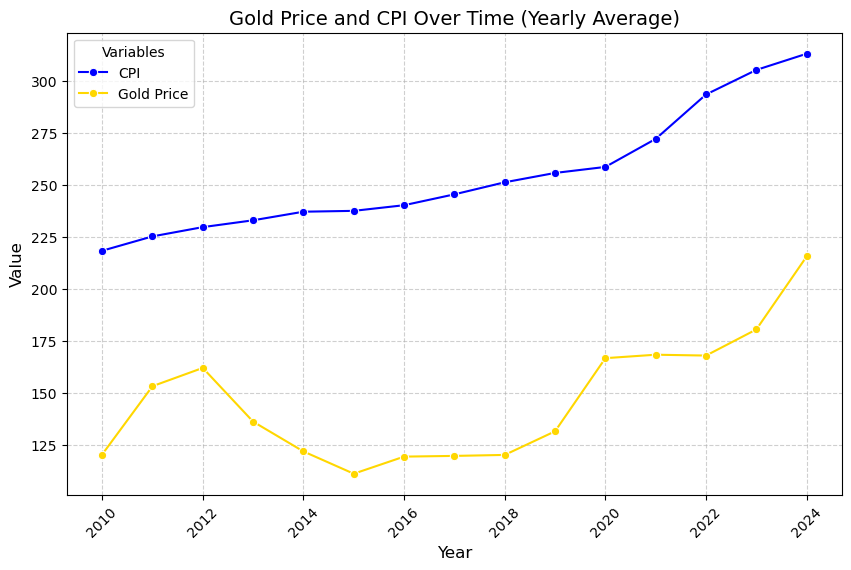

In [9]:
#graph6
data['year'] = pd.to_datetime(data['date']).dt.year
# Aggregate yearly averages for numeric columns
yearly_data = data.groupby('year').mean(numeric_only=True).reset_index()
# Plot Gold Price and CPI
plt.figure(figsize=(10, 6))
# Plot CPI
sns.lineplot(data=yearly_data, x='year', y='CPI', label='CPI', marker='o', color='blue')
# Plot Gold Price
sns.lineplot(data=yearly_data, x='year', y='gold close', label='Gold Price', marker='o', color='gold')
# Customize the plot
plt.title('Gold Price and CPI Over Time (Yearly Average)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(yearly_data['year'][::2], rotation=45)  # Show alternate years
plt.legend(title="Variables")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


HeatMap: Correlation of Gold price and predictors.

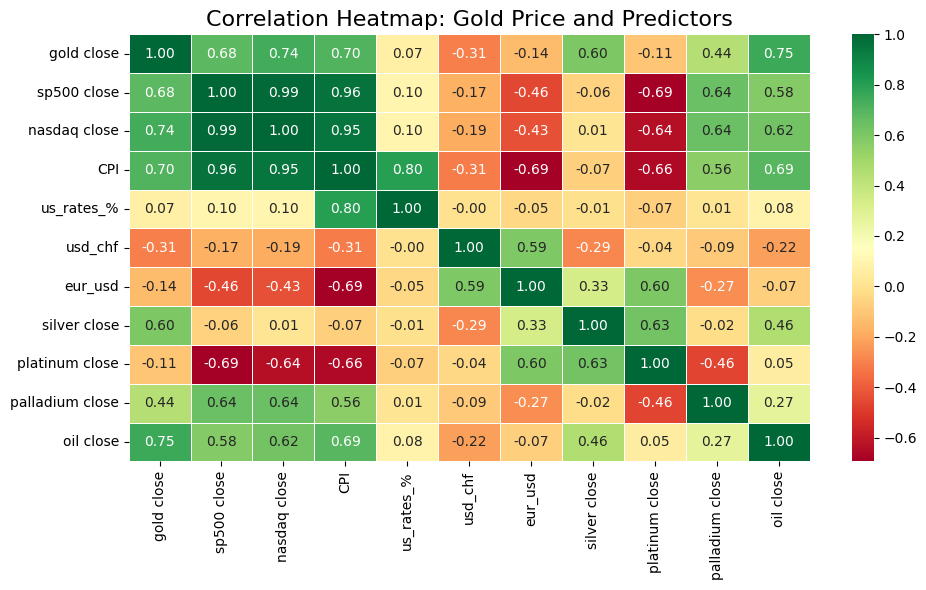

In [19]:
#graph7

# Define the columns for pairwise correlation
predictors = ['gold close', 'sp500 close', 'nasdaq close', 'CPI', 'us_rates_%', 'usd_chf', 
              'eur_usd', 'silver close', 'platinum close', 'palladium close', 'oil close']

# Calculate the correlation matrix
correlation_matrix = data[predictors].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)  # Red-Yellow-Green colormap
plt.title('Correlation Heatmap: Gold Price and Predictors', fontsize=16)
plt.tight_layout()
plt.show()



Foreign Exchange 

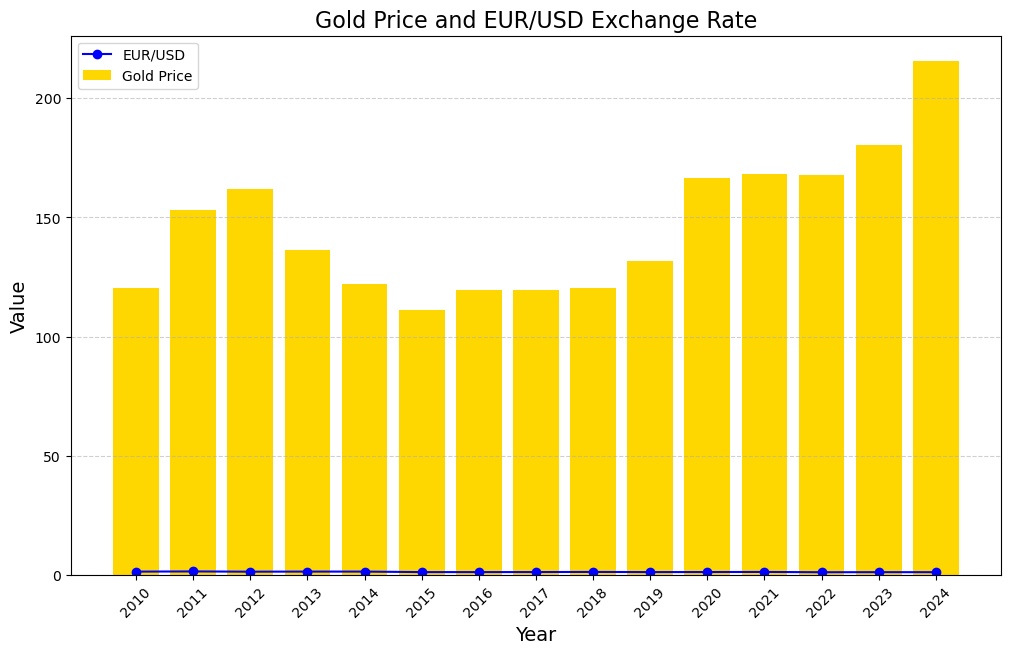

In [17]:
#graph8
# Plot for Gold Price and EUR/USD Exchange Rate
plt.figure(figsize=(12, 7))

# Bar plot for Gold Price
plt.bar(yearly_data['year'].astype(str), yearly_data['gold close'], color='gold', label='Gold Price')

# Line plot for EUR/USD Exchange Rate
plt.plot(yearly_data['year'].astype(str), yearly_data['eur_usd'], color='blue', marker='o', label='EUR/USD')

# Customize the plot
plt.title('Gold Price and EUR/USD Exchange Rate', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)

# Add legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [14]:
max_value = data['eur_usd'].max()
print("The maximum value in the 'eur_usd' column is:", max_value)

The maximum value in the 'eur_usd' column is: 1.4875


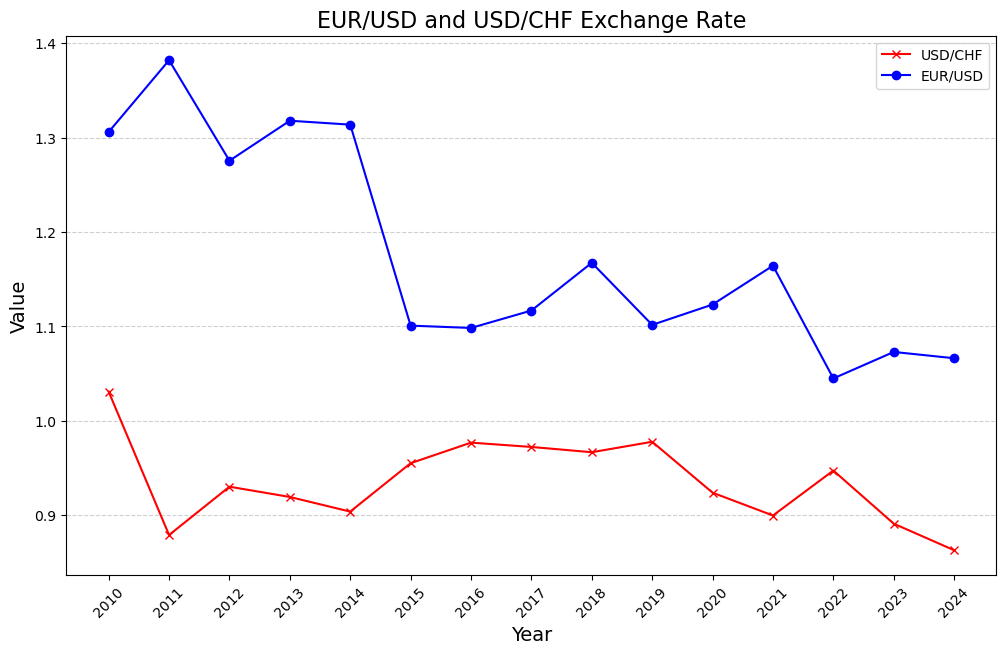

In [16]:
#graph9
plt.figure(figsize=(12, 7))
# Bar plot for USD/CHF Exchange Rate
plt.plot(yearly_data['year'].astype(str), yearly_data['usd_chf'], color='red',marker='x', label='USD/CHF')
# Line plot for EUR/USD Exchange Rate
plt.plot(yearly_data['year'].astype(str), yearly_data['eur_usd'], color='blue', marker='o', label='EUR/USD')
# Customize the plot
plt.title('EUR/USD and USD/CHF Exchange Rate', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
# Add legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Show the plot
plt.show()


Comparing the Volumnes of S&P500 and NASDAQ

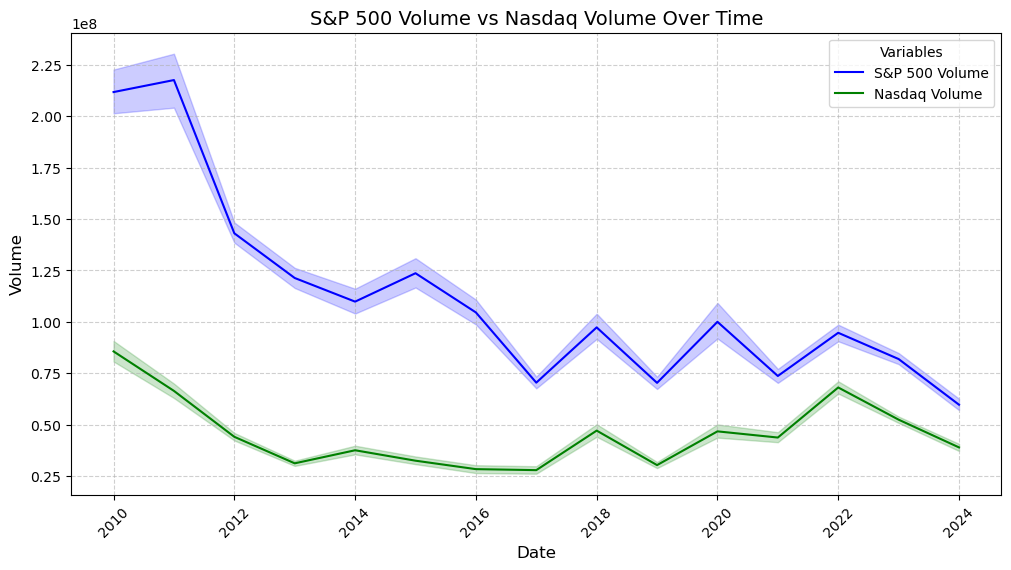

In [20]:
#graph10
# Line Plot: S&P 500 Volume vs Nasdaq Volume
plt.figure(figsize=(12, 6))
# Plot S&P 500 Volume
sns.lineplot(data=data, x='year', y='sp500 volume', label='S&P 500 Volume', color='blue')
# Plot Nasdaq Volume
sns.lineplot(data=data, x='year', y='nasdaq volume', label='Nasdaq Volume', color='green')
# Add titles and labels
plt.title('S&P 500 Volume vs Nasdaq Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.legend(title="Variables")
plt.grid(True, linestyle='--', alpha=0.6)
# Show the plot
plt.show()

Comparing the volumes of predictors with gold

Comparsion of Palladium, Platinum, Silver volumes per year

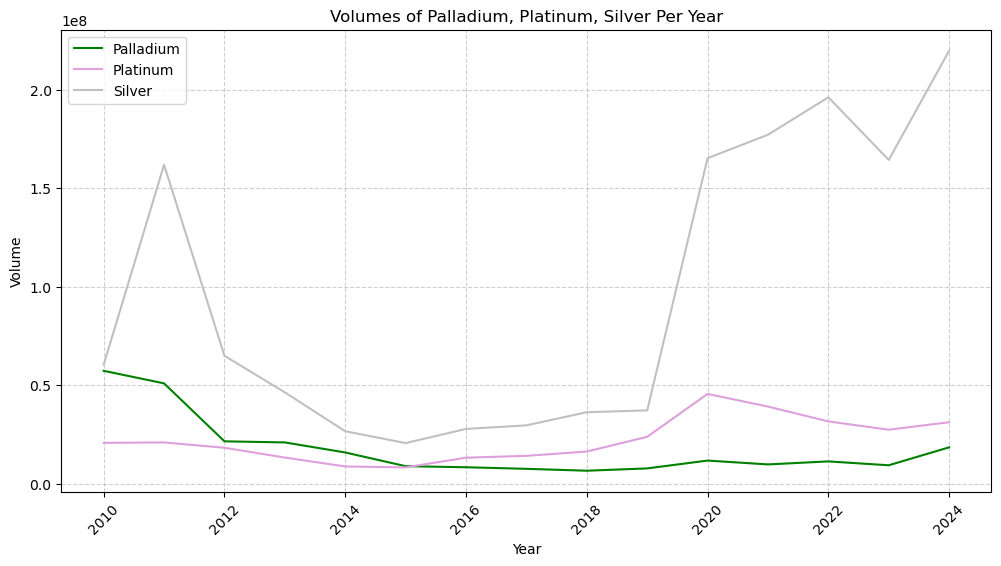

In [ ]:
#graph11
# Aggregate volumes of palladium, platinum, silver per year
yearly_volumes = data.groupby('year')[['palladium volume', 'platinum volume', 'silver volume']].sum().reset_index()

# Line plot for volumes of Palladium, Platinum, Silver per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_volumes, x='year', y='palladium volume', label='Palladium', color='green')
sns.lineplot(data=yearly_volumes, x='year', y='platinum volume', label='Platinum', color='plum')
sns.lineplot(data=yearly_volumes, x='year', y='silver volume', label='Silver', color='silver')
plt.title('Volumes of Palladium, Platinum, Silver Per Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.show()


Comparsion of Oil Volume with Gold Volume

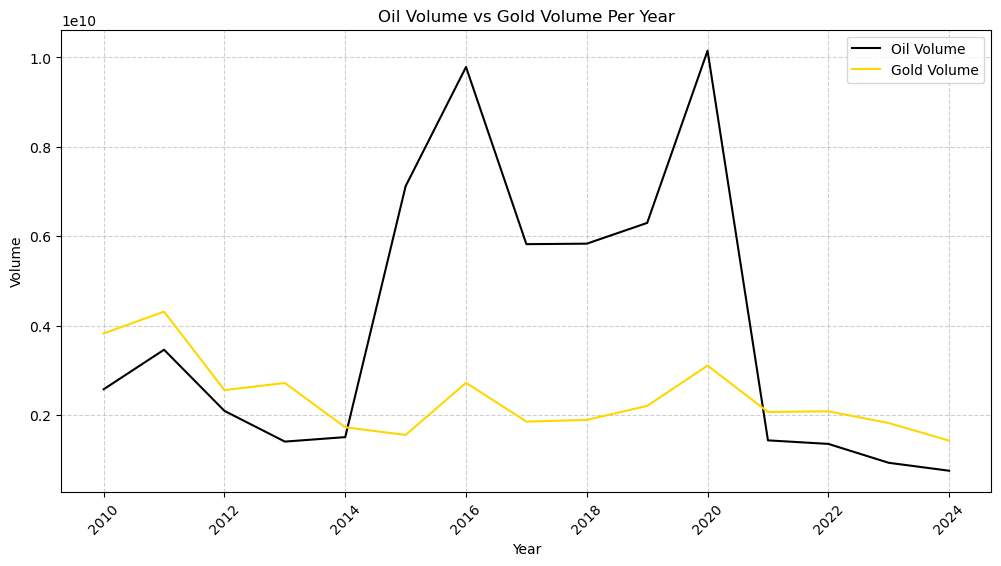

In [ ]:
#graph12
# Aggregate oil and gold volumes per year
yearly_volumes = data.groupby('year')[['oil volume', 'gold volume']].sum().reset_index()

# Line plot for Oil and Gold volumes per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_volumes, x='year', y='oil volume', label='Oil Volume', color='black')
sns.lineplot(data=yearly_volumes, x='year', y='gold volume', label='Gold Volume', color='gold')

# Titles and labels
plt.title('Oil Volume vs Gold Volume Per Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.show()


Piechart of palladium, silver, oil, platinum and gold volumes

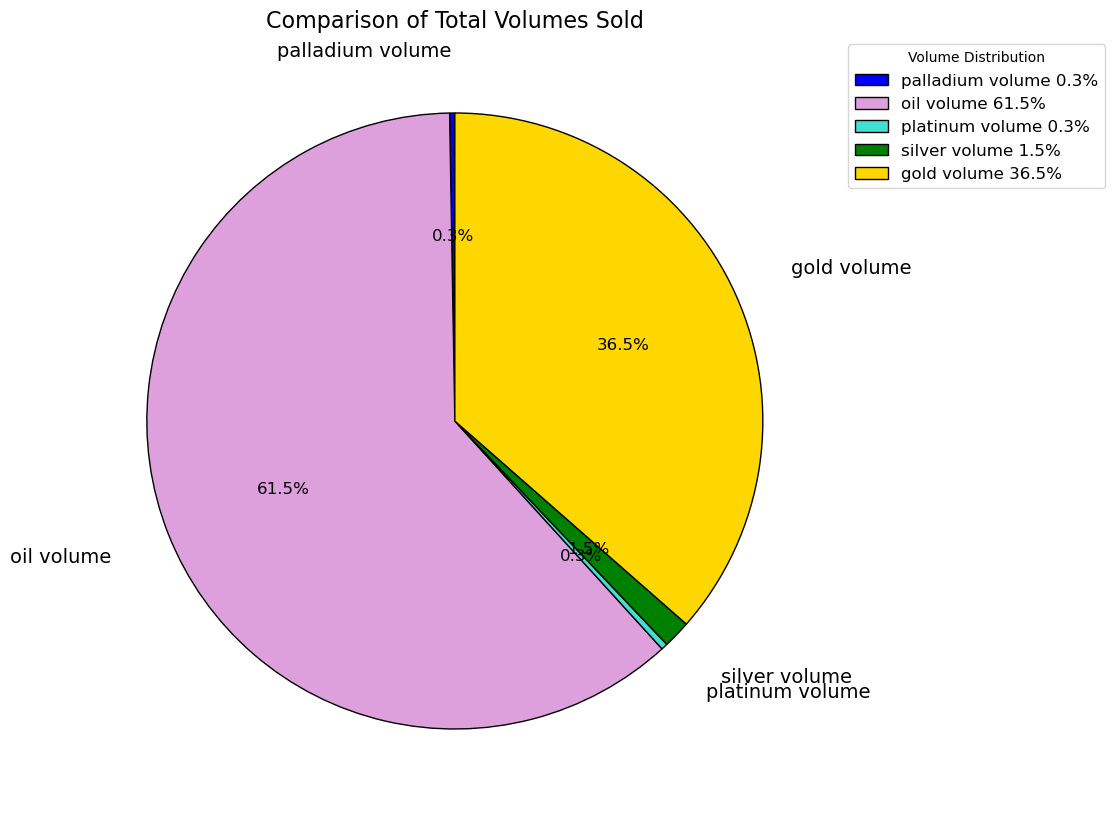

In [ ]:
#graph13
# Calculate total volumes for the metals and oil
total_volumes = data[['palladium volume', 'oil volume', 'platinum volume', 'silver volume', 'gold volume']].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))  # Adjusted figure size for better clarity
wedges, texts, autotexts = plt.pie(
    total_volumes,
    labels=total_volumes.index,
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=90,
    colors=['blue', 'plum', 'turquoise', 'green', 'gold'],
    textprops={'fontsize': 14},  # Increase font size for clarity
    labeldistance=1.2,  # Move labels outside the pie
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}  # Add edge separation for clarity
)

# Customize percentage texts to look smaller inside the pie and outside the pie
for autotext in autotexts:
    autotext.set_fontsize(12)  # Smaller font for the percentage inside

# Create the legend box to show percentages with matching colors
labels = [f'{label} {autotext.get_text()}' for label, autotext in zip(total_volumes.index, autotexts)]
plt.legend(
    labels,
    loc='upper left',
    fontsize=12,
    title="Volume Distribution",
    bbox_to_anchor=(1, 1)  # Position the legend box outside the chart
)

# Add title
plt.title('Comparison of Total Volumes Sold', fontsize=16)

# Show the plot
plt.show()



Distribution Fit

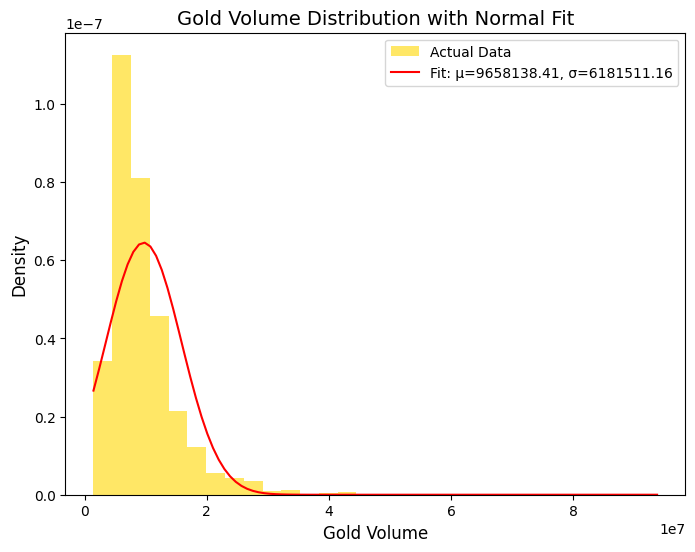

In [25]:
#graph14
from scipy.stats import norm

# Fit a normal distribution to gold volume
mu, std = norm.fit(data['gold volume'])

# Plot histogram and PDF
plt.figure(figsize=(8, 6))
plt.hist(data['gold volume'], bins=30, density=True, alpha=0.6, color='gold', label='Actual Data')
x = np.linspace(data['gold volume'].min(), data['gold volume'].max(), 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', label=f'Fit: µ={mu:.2f}, σ={std:.2f}')
plt.title('Gold Volume Distribution with Normal Fit', fontsize=14)
plt.xlabel('Gold Volume', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


Moving Average and Rolling Trends

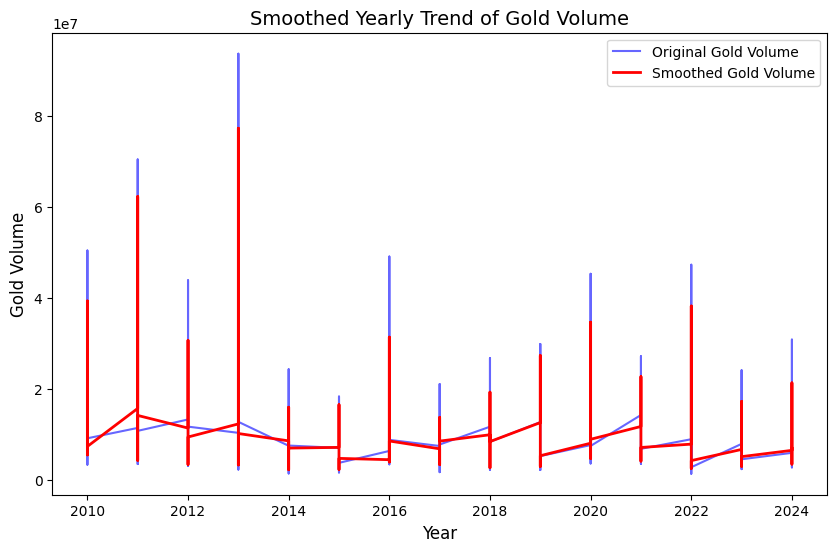

In [26]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter for smoothing
gold_volume_smoothed = savgol_filter(data['gold volume'], window_length=5, polyorder=2)

# Plot the original and smoothed trends
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['gold volume'], label='Original Gold Volume', color='blue', alpha=0.6)
plt.plot(data['year'], gold_volume_smoothed, label='Smoothed Gold Volume', color='red', linewidth=2)
plt.title('Smoothed Yearly Trend of Gold Volume', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gold Volume', fontsize=12)
plt.legend()
plt.show()


Autocorrelation Plot

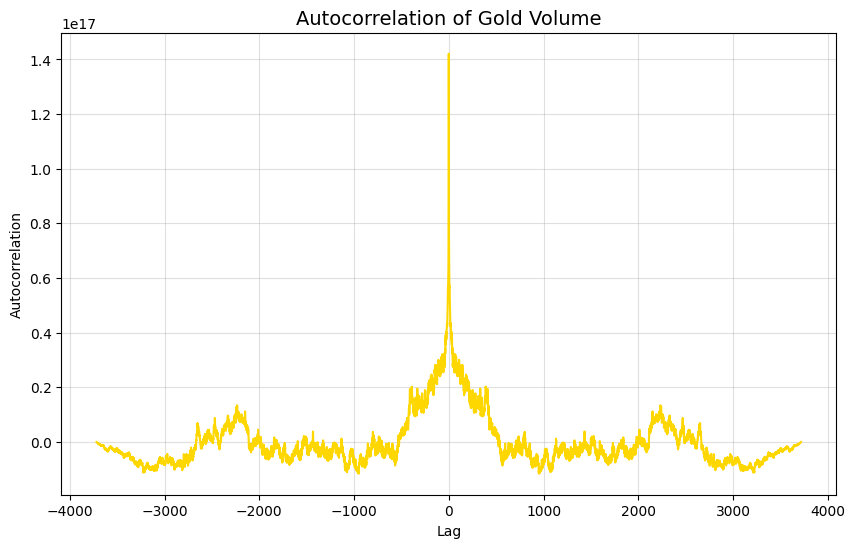

In [34]:
from scipy.signal import correlate

# Example: Autocorrelation of Gold volume
gold_volume = data['gold volume'] - data['gold volume'].mean()
autocorr = correlate(gold_volume, gold_volume, mode='full')

# Plot autocorrelation
lags = np.arange(-len(gold_volume) + 1, len(gold_volume))
plt.figure(figsize=(10, 6))
plt.plot(lags, autocorr, color='gold')
plt.title('Autocorrelation of Gold Volume', fontsize=14)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(alpha=0.4)
plt.show()
